### Problem Statement

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit.

### Data Set Information

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product(bank term deposit) would be ('yes') or not ('no') subscribed.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [4]:
bank = pd.read_csv('C:/Users/bhave/01. Supervised Learning/pandas_for_everyone-master/data/bank-additional-full.csv',sep=';')
pd.set_option('display.max_columns',21)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# list all columns (for reference)
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
bank.shape

(41188, 21)

### Attribute Information

#### Bank client data:

1. Age : (numeric)
2. Job : type of job ( categorical : 'admin.', 'blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. Martial : martial status(categorical : 'divorced', 'married','single','unknown'; note :'divorced' means divorced or widowed)
4. Education (categorical : 'basic.4y', 'basic.6y', 'high.school','illiterate','professional.course','university.degree','unknown')
5. Default : has credit in default? (categorical:'no','yes','unknown')
6. Housing : has housing loan? (categorical:'no','yes','unknown')
7. Loan : has personal loan? (categorical:'no','yes','unknown')

#### Related with the last contact of the current campaign:

1. Contact : contact communication type (categorical : 'cellular','telephone')
2. Month : last contact month of year (categorical : 'jan','feb','mar'...'nov','dec')
3. Day_of_week : last contact day of the week (categorical : 'mon','tue','wed','thurs','fri')
4. Duration : Last contact duration , in seconds(numeric). 

#### Other attributes:

1. Campaign : number of contacts performed during this campaign and for this client 
2. Pdays : number of days that passed by after the client was last contacted from a previous campaign
3. Previous : number of contacts performed before this campaign for this client
4. Poutcome : outcome of the previous marketing campaign ( categorical :'failure','nonexistent','success')

#### Social and economic context attributes:

1. Emp.var.rate : employment variation rate - quarterlyindicator (numeric)
2. Cons.price.idx : consumer price index - monthly indicator (numeric)
3. Cons.conf.idx : consumer confidence index - monthly indicator (numeric)
4. Euribor3m : euribor 3 month rate - daily indicator (numeric)
5. Nr.employed : number of employees - quarterly indicator (numeric)

#### Output variable(desired target):

y - has the client subscribed a term deposit ? (binary:'yes','no')

### Visualizing the Target (term deposit)

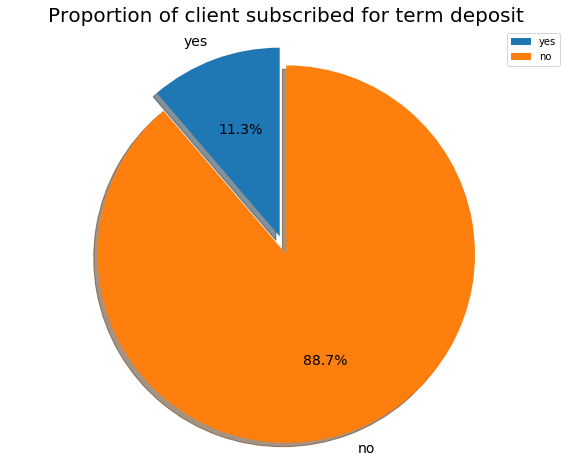

In [7]:
labels = 'yes','no'
sizes = [bank.y[bank['y']=='yes'].count(), bank.y[bank['y']=='no']
         .count()]
explode = (0, 0.1)
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, 
       textprops={'fontsize':14})
ax.axis('equal')
plt.legend(loc='upper right')
plt.title("Proportion of client subscribed for term deposit",size=20)
plt.show()

#### Data types of the features

In [9]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

Converting the object data types features to category data types, as it reduces the memory size.

In [10]:
for col in bank.select_dtypes("object"):
    bank[col] = bank[col].astype("category")
    
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null category
marital           41188 non-null category
education         41188 non-null category
default           41188 non-null category
housing           41188 non-null category
loan              41188 non-null category
contact           41188 non-null category
month             41188 non-null category
day_of_week       41188 non-null category
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null category
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null category
dtypes: category(11), float64

##### On changing the features data type to "category" the memory size has reduced from 6.6 MB to 3.6 MB.

In [11]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


##### We observe some outliers present in the columns "duration" and "campaign".

### Data Cleaning

In [12]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Outlier Analysis

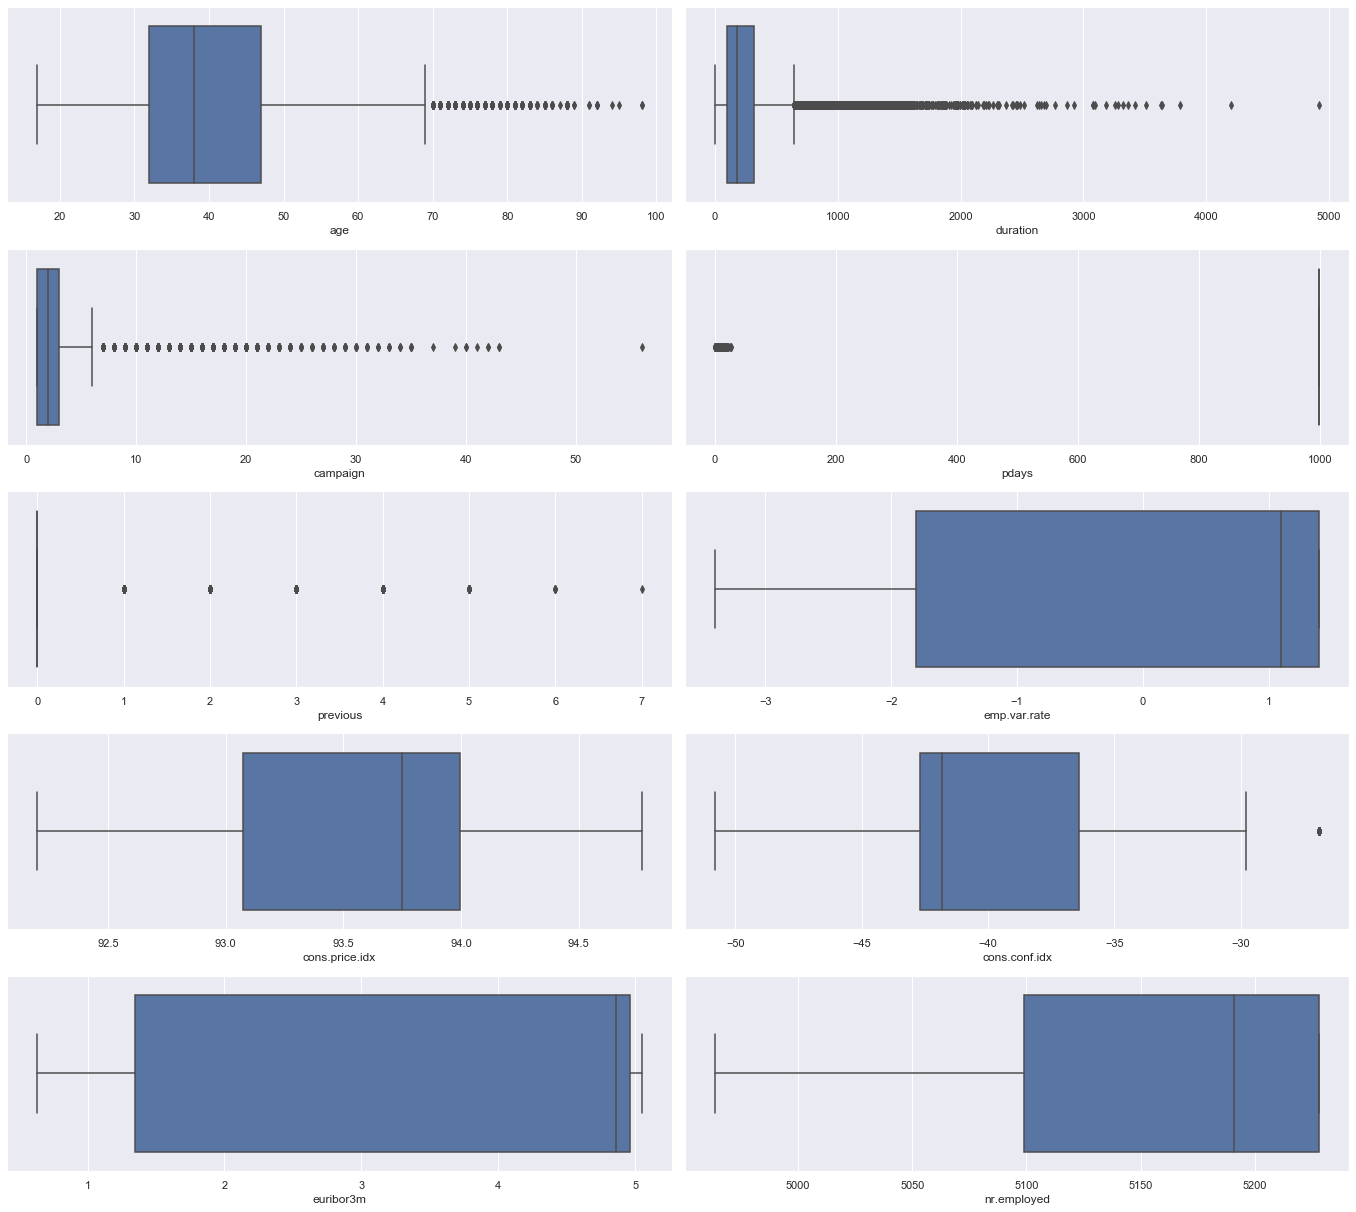

In [13]:
sns.set()
fig = plt.figure(figsize=(19,17))
i = 1
for column in bank.select_dtypes(["int64","float64"]):
    plt.subplot(5,2,i)
    sns.boxplot(bank[column])
    i = i+1
plt.tight_layout()
plt.show()

### Inferences:-

1. For column "age", the values ranging above 70 to 100 are not exactly called outliers.
2. Column "duration" has many values ranging above the Inter-Quartile Range. Hence, we can consider data points lying above 4000 as an outlier.
3. Even "campaign" column has many data points lying above IQR range, except campaign greater than 50 can be treated as an outlier.

### Displaying the outliered rows

In [14]:
bank[bank.duration > 4000]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
22192,52,blue-collar,married,basic.4y,no,no,no,telephone,aug,thu,4199,3,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,yes
24091,33,technician,single,professional.course,no,yes,no,telephone,nov,mon,4918,1,999,0,nonexistent,-0.1,93.200,-42.0,4.406,5195.8,no


In [15]:
bank[bank.campaign > 50]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4107,32,admin.,married,university.degree,unknown,unknown,unknown,telephone,may,mon,261,56,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no


In [18]:
idx_lst = [22192,24091,4107]
bank = bank.drop(bank.index[[idx_lst]])

# Shape of bank dataframe after deletion
bank.shape

(41182, 21)

### Univariate Analysis

#### Categorical Variables

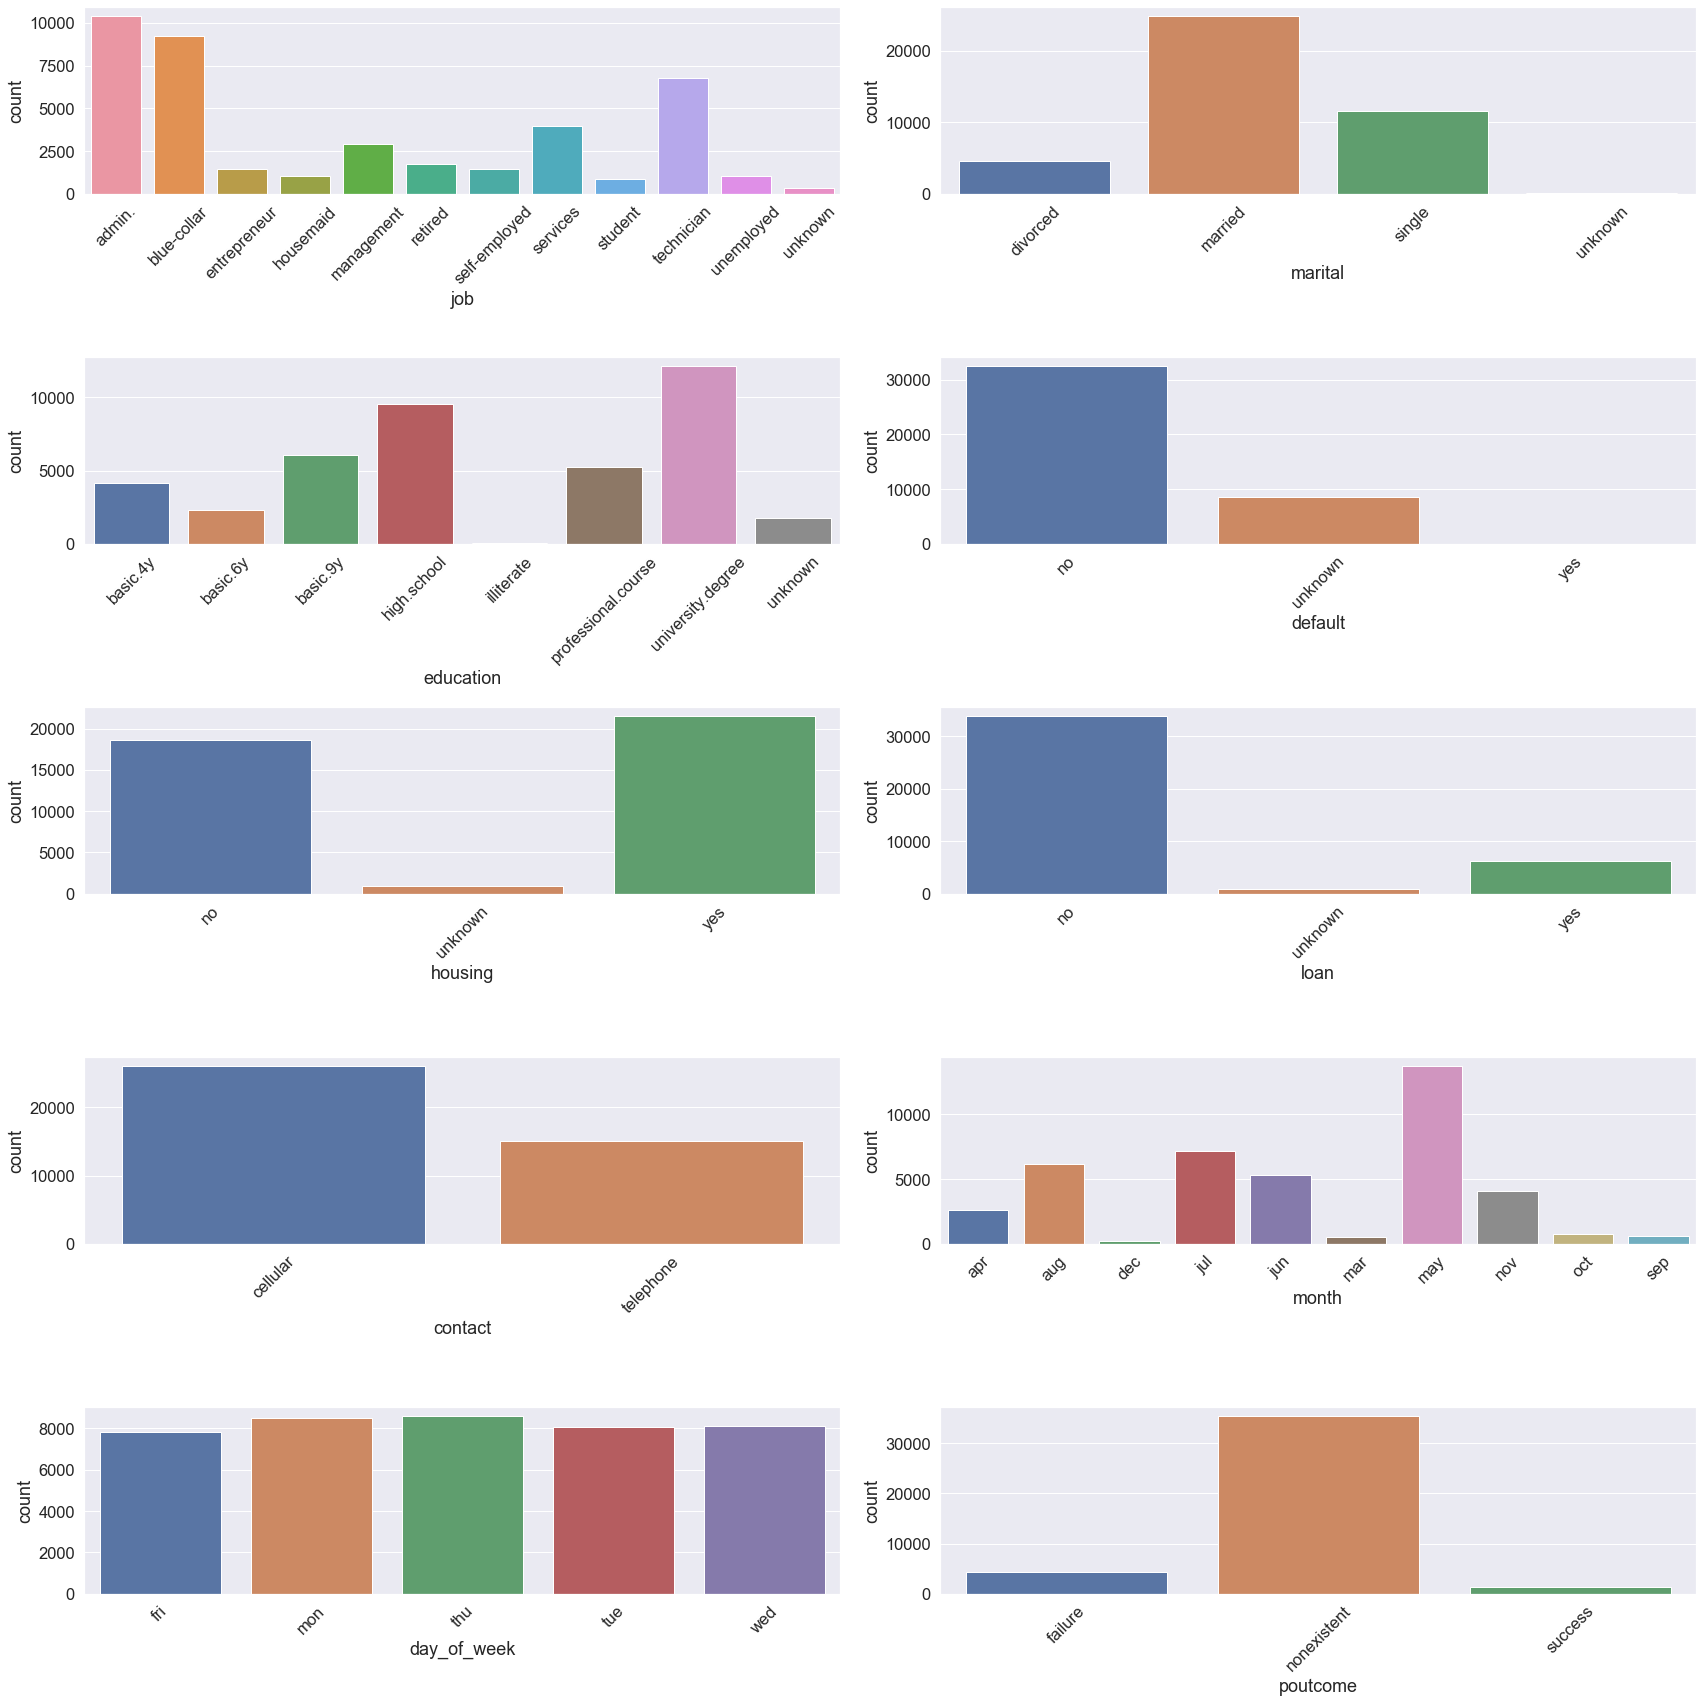

In [19]:
sns.set(rc={'figure.figsize':(24,24)}, font_scale=1.5)
#fig = plt.figure(figsize=(19, 15))
i = 1
for column in bank.select_dtypes("category"):
    if column != "y":
        plt.subplot(5,2,i)
        sns.countplot(bank[column])
        i = i + 1
        plt.xticks(rotation=45)       
plt.tight_layout()
plt.show()

Above univariate analysis is distribution of labels across several columns.

#### Continuous Variables

C:\Users\bhave\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


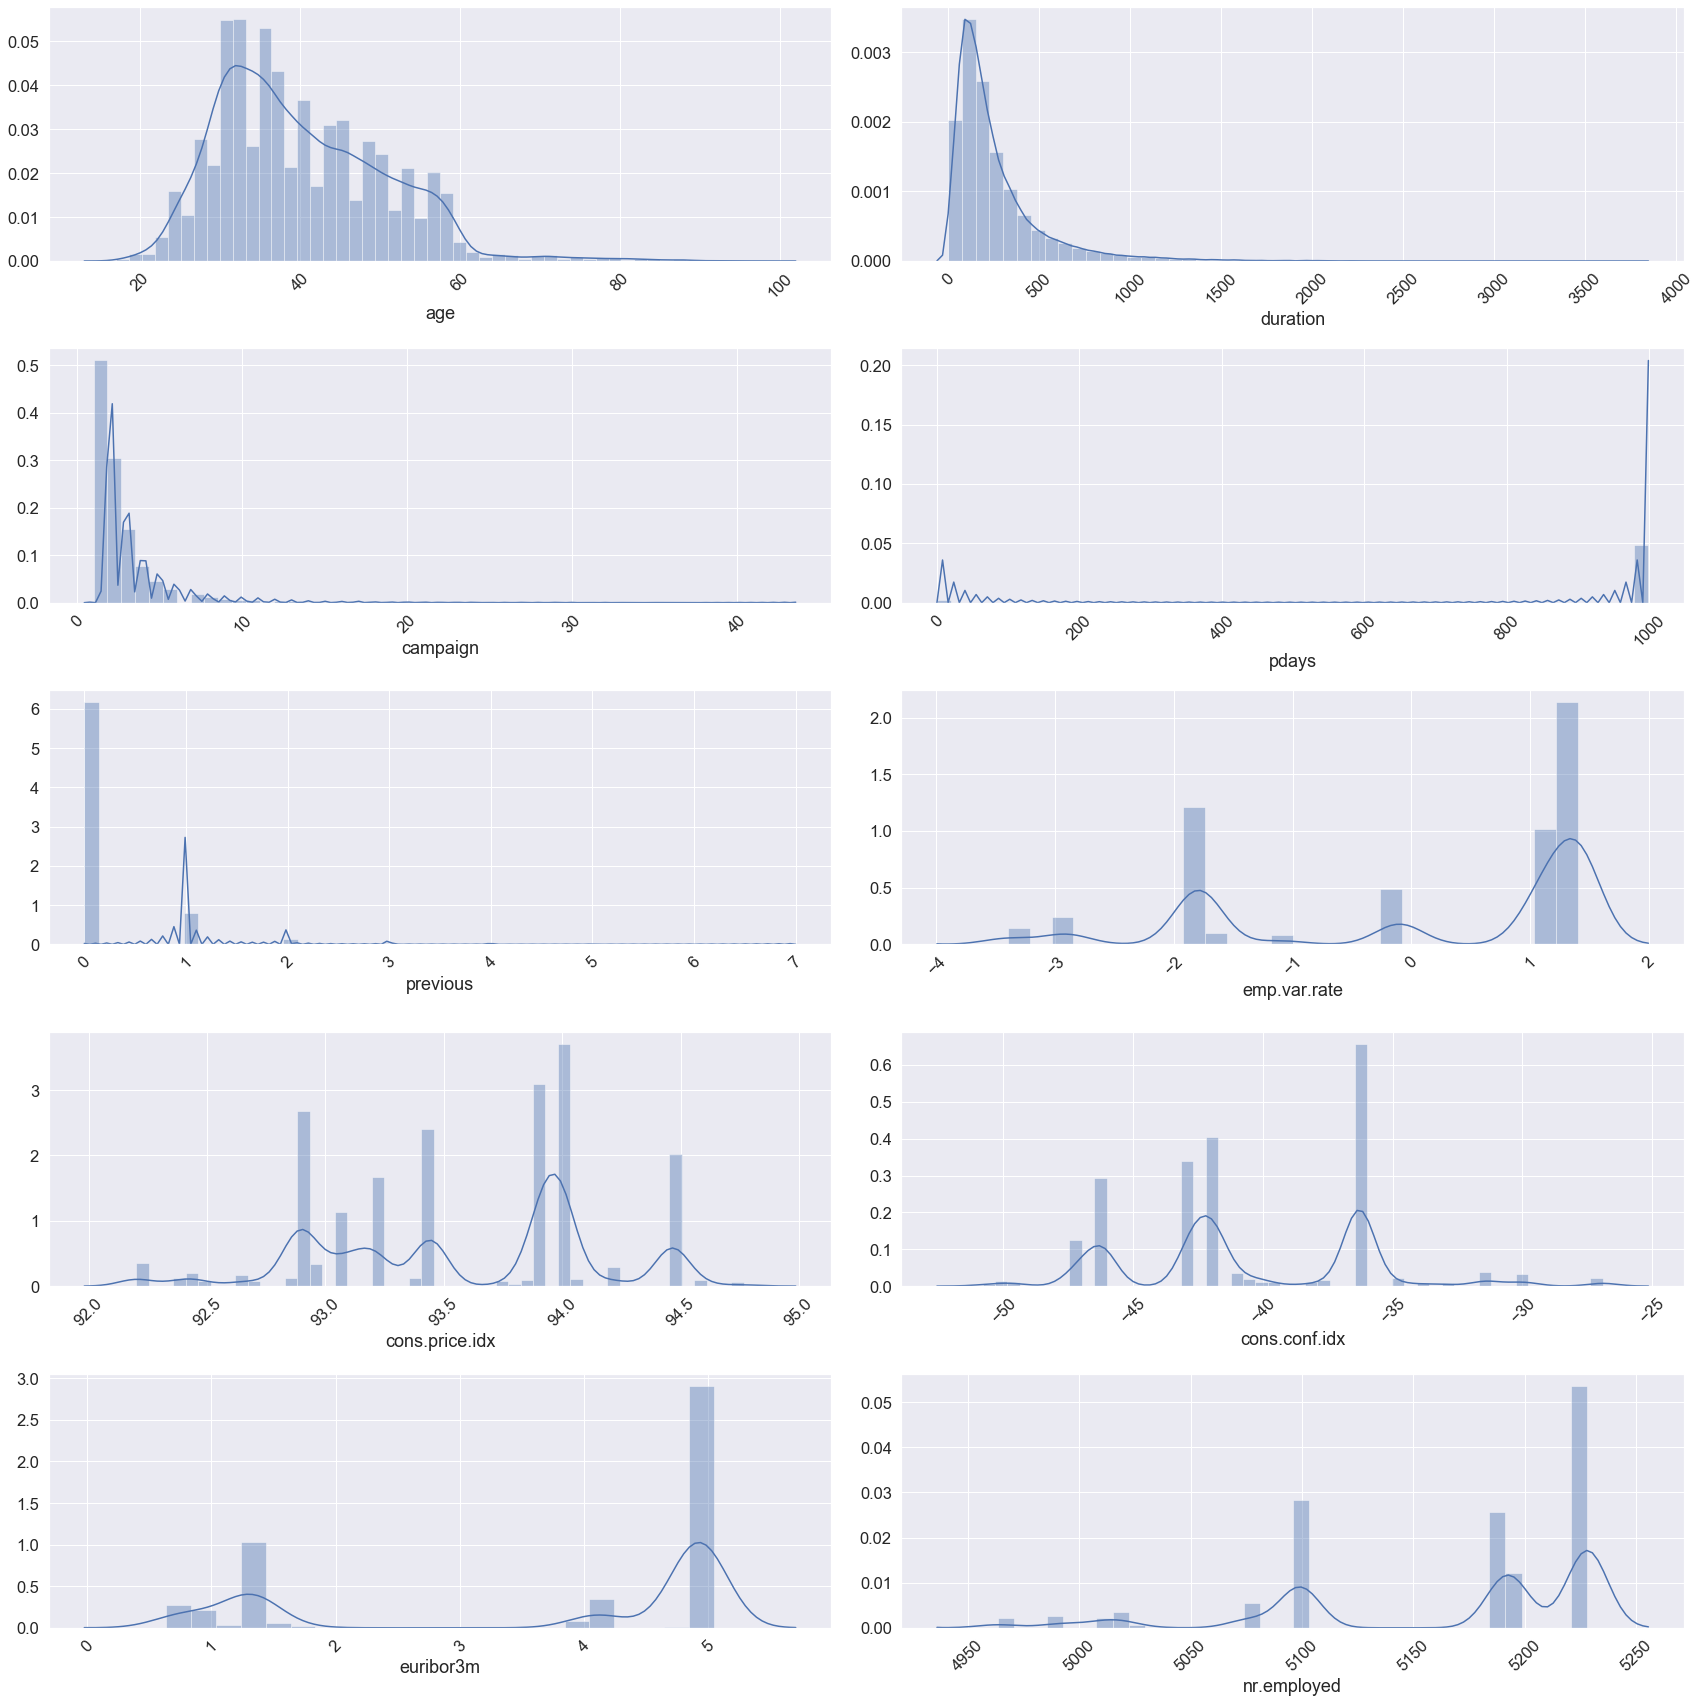

In [21]:
sns.set(rc={'figure.figsize':(24,24)}, font_scale=1.5)
i = 1
for column in bank.select_dtypes(["int64","float64"]):
    plt.subplot(5,2,i)
    sns.distplot(bank[column])
    i = i + 1
    plt.xticks(rotation=45)       
plt.tight_layout()
plt.show()

#### Distributions across continuous features

Column "age" follows a normal distribution.However, columns "duration" and "campaign " are right-skewed. Column "pdays" follows left-skewed distribution. Column "previous" is highly right-skewed.The other columns are following bi-modal and tri-modal distributions.

### Bi-variate Analysis

#### Continuous Features comparison w.r.t Target

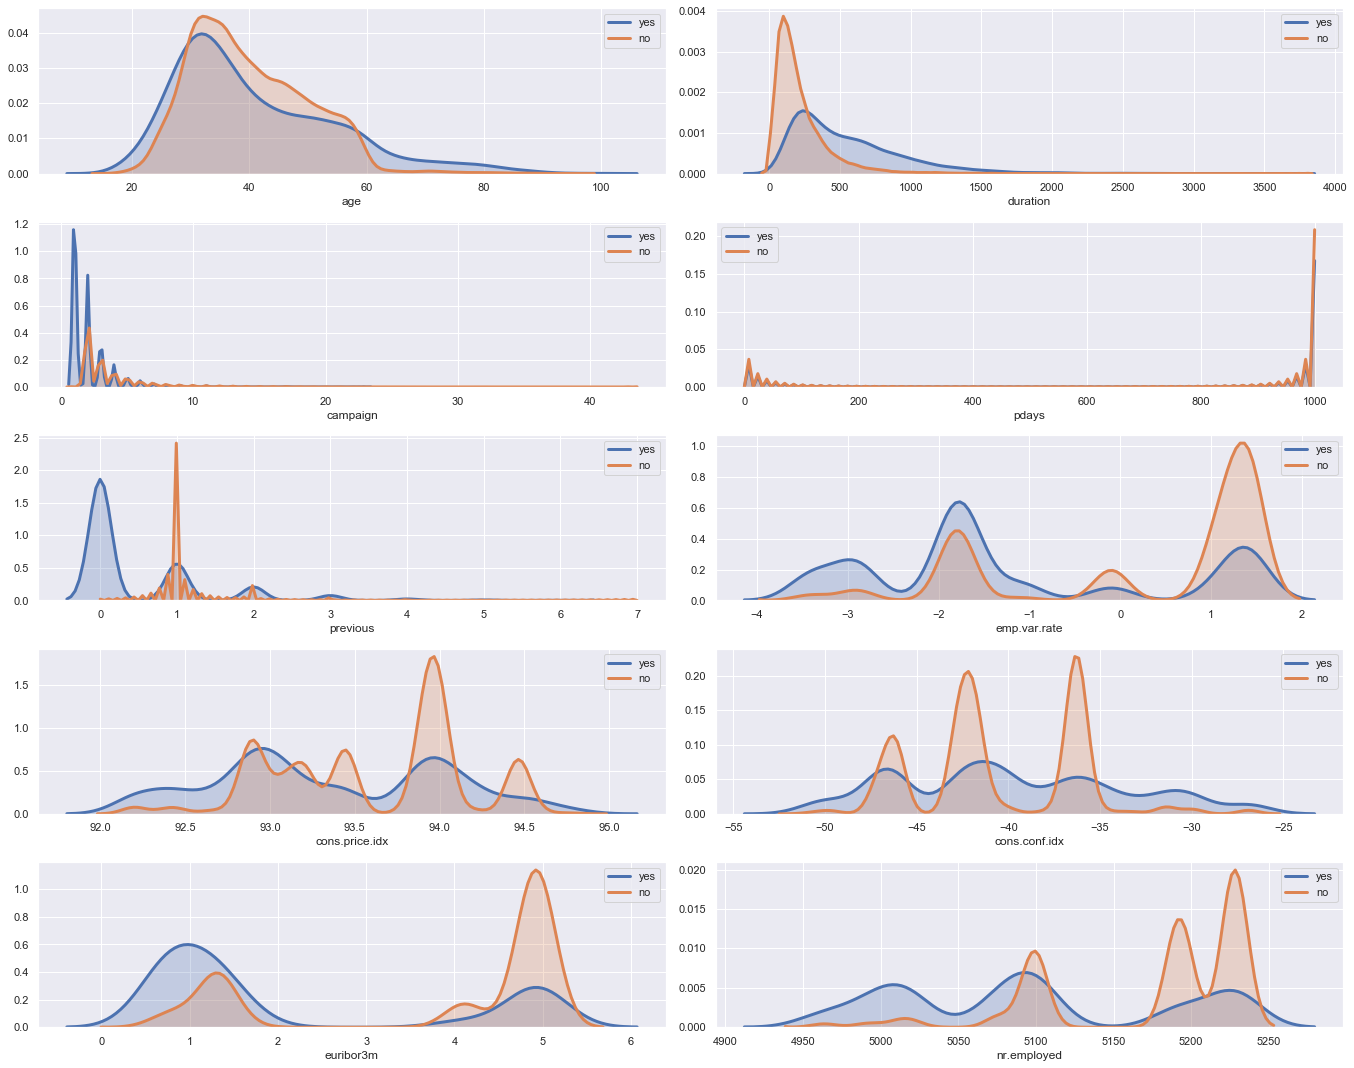

In [22]:
sns.set()
fig = plt.figure(figsize=(19,15))
i=1
for column in bank.select_dtypes(["int64","float64"]):
    plt.subplot(5,2,i)
    sns.distplot(bank.loc[bank.y=='yes',column],hist=False,kde=True,
                kde_kws={'shade': True, 'linewidth':3},
                label='yes')
    sns.distplot(bank.loc[bank.y=='no',column],hist=False,kde=True,
                kde_kws={'shade': True, 'linewidth':3},
                label='no')
    i=i+1
plt.tight_layout()
plt.show()

#### Inferences from distribution of continuous features

1. While looking at column duration, we see lot of clients who didn't subscribe a term deposit having high duration range.
2. In rest other columns, we see lot of bimodal/trimodal distribution present, and there are lot of values which range above the normal range for clients' who haven't subscribed for a term deposit.

#### Comparison of Categorical Features w.r.t Target

In [23]:
def bivariate_cat(data,col1,col2,rot):
    if col2=='y':
        cross_tab = pd.crosstab(data[col1], data[col2]).apply(lambda x: x/x.sum() * 100, axis=1).round(2)
        cross_tab.plot.bar(figsize=(12,5))
        plt.xlabel('{}'.format(col1))
        plt.ylabel('% of clients subscribed for term deposit'.format(col1))
        plt.title('{} Vs term deposit subscription'.format(col1))
        plt.xticks(rotation=rot)
        plt.show()
        return cross_tab

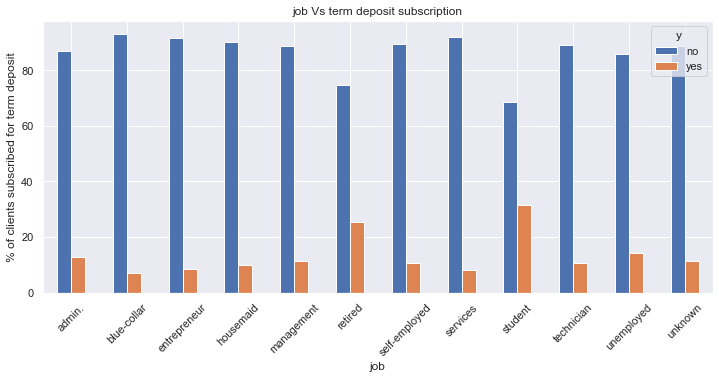

y,no,yes
job,,
admin.,87.03,12.97
blue-collar,93.12,6.88
entrepreneur,91.48,8.52
housemaid,90.00,10.00
management,88.78,11.22
retired,74.77,25.23
self-employed,89.51,10.49
services,91.86,8.14
student,68.65,31.35


In [24]:
bivariate_cat(bank, 'job','y',45)

Suprisingly, we see the students subscribed a lot in term deposit, followed by retired people and then unemployed. Students might have subscribed so higher educations, retired people as a means of the savings they have carried out in their lifetime. And unemployed must be investing in it so that the amount is used as security till they get a job.

#### Relationship of marital w.r.t target(y)

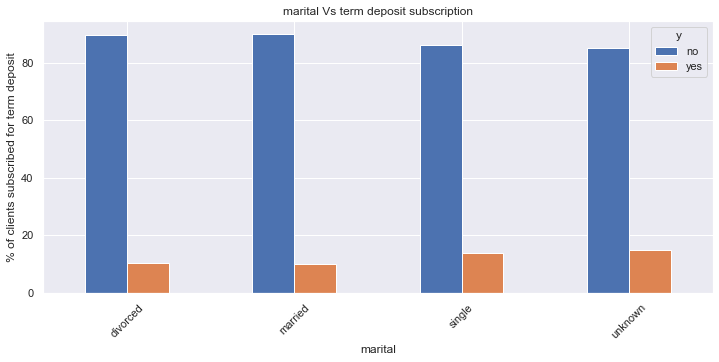

y,no,yes
marital,,
divorced,89.68,10.32
married,89.85,10.15
single,86.00,14.00
unknown,85.00,15.00


In [25]:
bivariate_cat(bank, 'marital','y',45)

##### people who are single and whose marital status isn't known are investing a lot compared to the rest others.

#### Relationship between education w.r.t y(target)

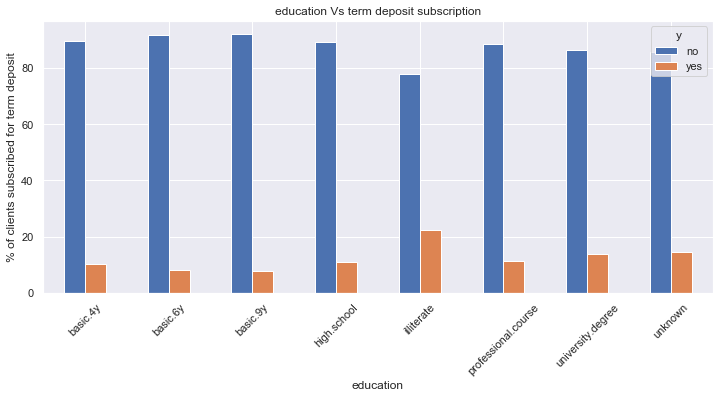

y,no,yes
education,,
basic.4y,89.77,10.23
basic.6y,91.80,8.20
basic.9y,92.17,7.83
high.school,89.16,10.84
illiterate,77.78,22.22
professional.course,88.65,11.35
university.degree,86.27,13.73
unknown,85.55,14.45


In [26]:
bivariate_cat(bank, 'education','y',45)

#####  Illiterates and people whose education status is unknown are subscribing a lot in term deposit compared to others.

#### How credit in default is going to have relation with subscription of term deposit??

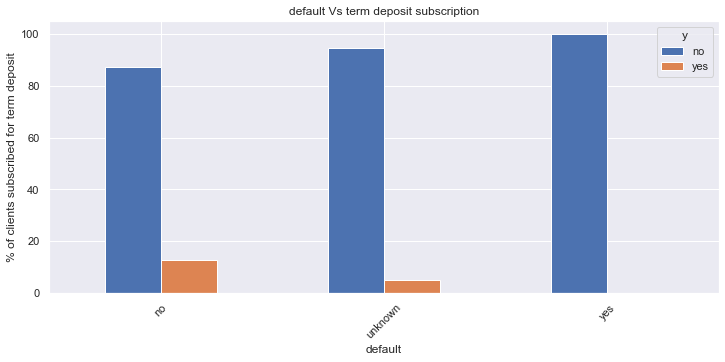

y,no,yes
default,,
no,87.13,12.87
unknown,94.85,5.15
yes,100.00,0.00


In [27]:
bivariate_cat(bank, 'default','y',45)

##### As known the people who don't have default are the ones subscribing for term deposit.

##### Let us compare with the last contact day of the week and number of days that passed by after the client was last contacted from a previous campaign

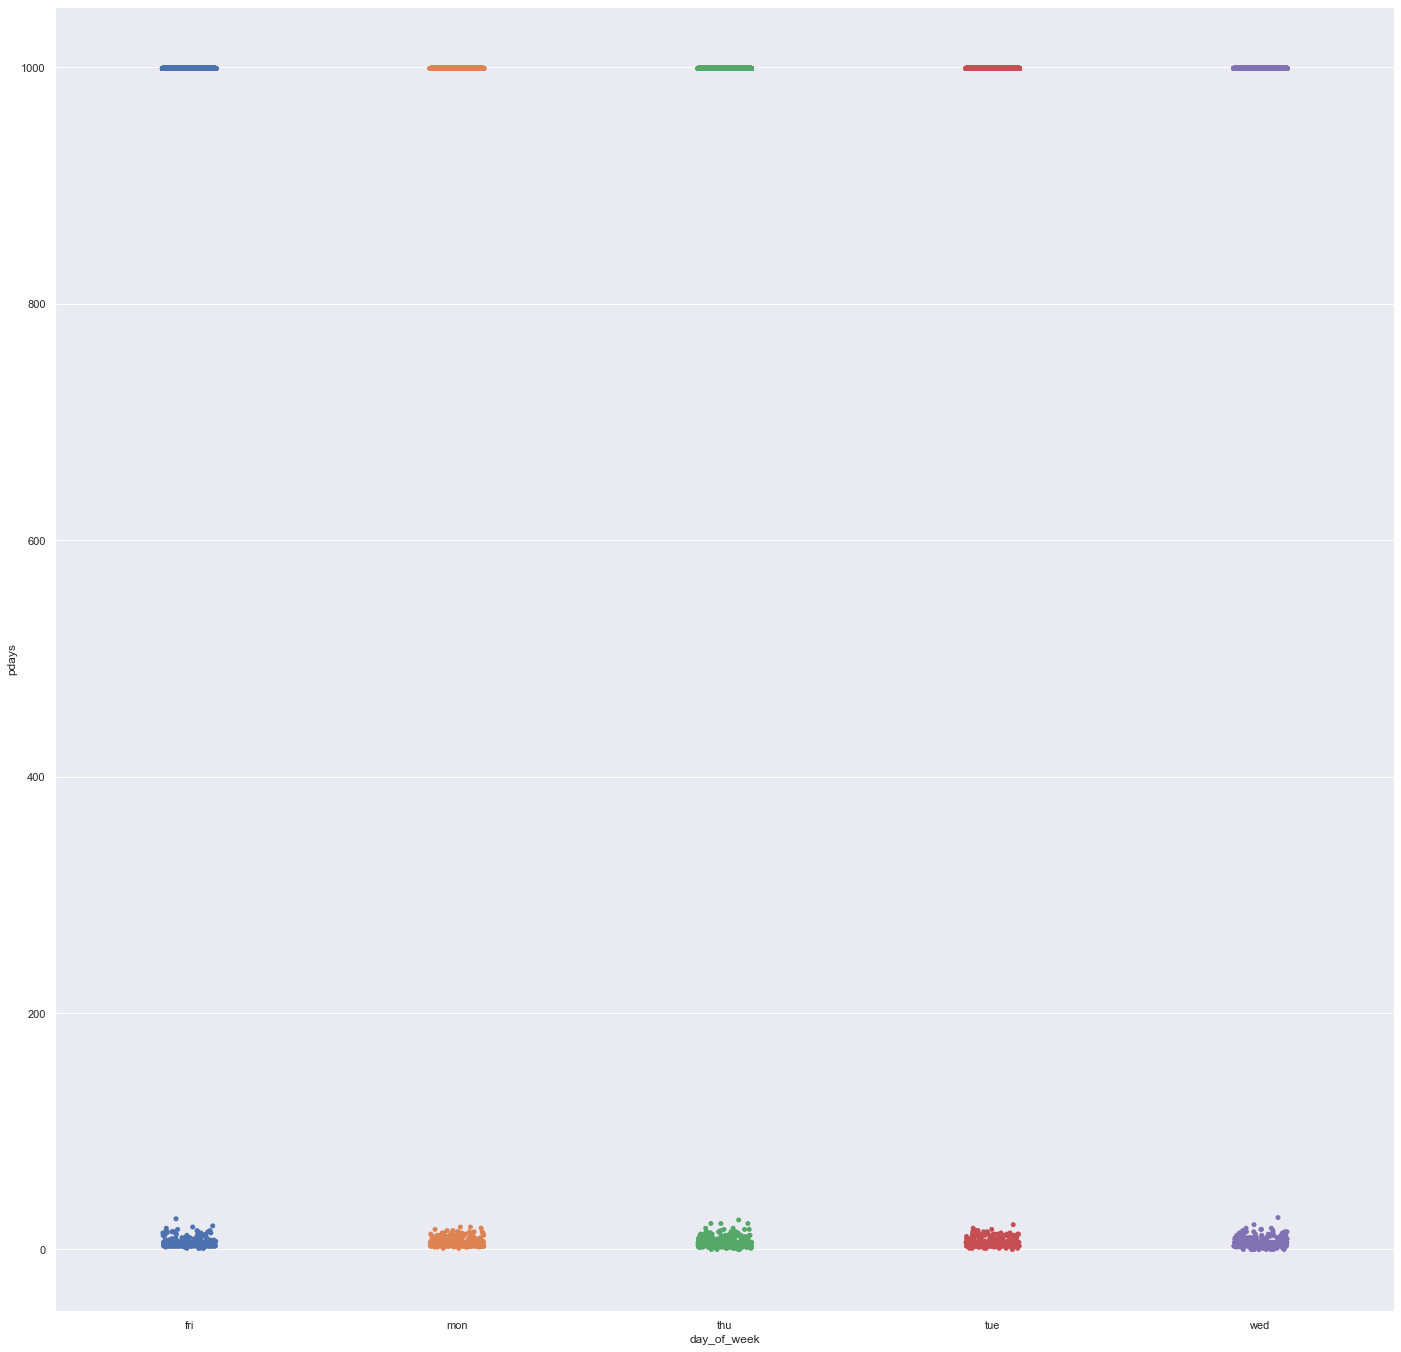

In [28]:
sns.stripplot(x='day_of_week',y='pdays',data=bank)

##### The plot shows scattered data along above 0 days and 1000 days

#### Encoding Categorical Features

In [29]:
from sklearn.preprocessing import LabelEncoder

# target column
tgt_col = ['y']

# Categorical cols
category_names = bank.nunique()[bank.nunique() < 15].keys().tolist()
category_names = [x for x in category_names if x not in tgt_col]

# Numerical cols
num_cols = [i for i in bank.columns if i not in category_names + tgt_col]

# Binary cols
bin_cols = bank.nunique()[bank.nunique()==2].keys().tolist()

# Multi-cols
multi_cols = [i for i in category_names if i not in bin_cols]

# Label Encoding Binary cols
le = LabelEncoder()
for i in bin_cols:
    bank[i] = le.fit_transform(bank[i])
    
# Duplicating cols for multi-value columns
bank = pd.get_dummies(data=bank, columns=multi_cols)

In [30]:
bank.head()

,age,contact,duration,campaign,pdays,cons.price.idx,cons.conf.idx,euribor3m,y,job_admin.,...,nr.employed_4991.6,nr.employed_5008.7,nr.employed_5017.5,nr.employed_5023.5,nr.employed_5076.2,nr.employed_5099.1,nr.employed_5176.3,nr.employed_5191.0,nr.employed_5195.8,nr.employed_5228.1
0,56,1,261,1,999,93.994,-36.4,4.857,0,0,...,0,0,0,0,0,0,0,1,0,0
1,57,1,149,1,999,93.994,-36.4,4.857,0,0,...,0,0,0,0,0,0,0,1,0,0
2,37,1,226,1,999,93.994,-36.4,4.857,0,0,...,0,0,0,0,0,0,0,1,0,0
3,40,1,151,1,999,93.994,-36.4,4.857,0,1,...,0,0,0,0,0,0,0,1,0,0
4,56,1,307,1,999,93.994,-36.4,4.857,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Normalizing features

In [31]:
cont_features = []
for features in bank.select_dtypes(include=['int64','float64']):
    cont_features.append(features)

In [32]:
bank_data = bank
# Scaling Numerical features
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
bank_data[cont_features] = minmax.fit_transform(bank[cont_features].values)

In [33]:
bank_data.head()

,age,contact,duration,campaign,pdays,cons.price.idx,cons.conf.idx,euribor3m,y,job_admin.,...,nr.employed_4991.6,nr.employed_5008.7,nr.employed_5017.5,nr.employed_5023.5,nr.employed_5076.2,nr.employed_5099.1,nr.employed_5176.3,nr.employed_5191.0,nr.employed_5195.8,nr.employed_5228.1
0,0.481481,1,0.068956,0.0,1.0,0.698753,0.60251,0.957379,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.493827,1,0.039366,0.0,1.0,0.698753,0.60251,0.957379,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.246914,1,0.059709,0.0,1.0,0.698753,0.60251,0.957379,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.283951,1,0.039894,0.0,1.0,0.698753,0.60251,0.957379,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.481481,1,0.081110,0.0,1.0,0.698753,0.60251,0.957379,0,0,...,0,0,0,0,0,0,0,1,0,0


#### We see around 89 features. So, let us reduce the dimensionality of features usign PCA.

### Model Building

In [34]:
Y = bank_data['y']
bank_data = bank_data.drop('y',axis=1)

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

X = pca.fit_transform(bank_data)

#### Splitting of data set into Train and Test

In [36]:
# evaluate the model by splitting into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=12)

### Decision Tree classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

### Model Fitting

In [38]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [39]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [40]:
predicted = model.predict(X_test)

### Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
conf_matrix = confusion_matrix(y_test, predicted)
print("Confusion Matrix :", conf_matrix)

Confusion Matrix : [[9951 1007]
 [1019  378]]


### Classification Report

In [43]:
cf_repo = classification_report(y_test, predicted)
print(cf_repo)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     10958
           1       0.27      0.27      0.27      1397

    accuracy                           0.84     12355
   macro avg       0.59      0.59      0.59     12355
weighted avg       0.84      0.84      0.84     12355



In [44]:
# Accuracy Score
from sklearn import metrics
print("Accuracy Score of Decision Tree Classifier : ",metrics.accuracy_score(y_test, predicted))

Accuracy Score of Decision Tree Classifier :  0.8360178065560502


### Hyper-parameter tuning

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [46]:
# Define the parameter values that should be searched
sample_split_range = range(10,50,100)
param_grid = dict(min_samples_split=sample_split_range)

# Instantiate the grid
grid_dtc = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')

# Fitting the model on hyper-tuning
grid_dtc.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(10, 50, 100)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score

In [47]:
# Prediction
grid_pred = grid_dtc.predict(X_test)

# Predicting Probabilities
grid_prob = grid_dtc.predict_proba(X_test)

### Confusion Matrix

In [48]:
grid_conf_matrix = confusion_matrix(y_test, grid_pred)
print("Confusion Matrix :", grid_conf_matrix)

Confusion Matrix : [[10088   870]
 [ 1075   322]]


### Classification Report

In [49]:
grid_cf_repo = metrics.classification_report(y_test, grid_pred)
print(grid_cf_repo)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     10958
           1       0.27      0.23      0.25      1397

    accuracy                           0.84     12355
   macro avg       0.59      0.58      0.58     12355
weighted avg       0.83      0.84      0.84     12355



In [50]:
# Accuracy Score
print("Accuracy Score of Decision Tree Classifier on Hyper-tuning : ",metrics.accuracy_score(y_test, grid_pred))

Accuracy Score of Decision Tree Classifier on Hyper-tuning :  0.8425738567381627


### max_depth

Let us consider max_depth from 0 to 100.

In [51]:
from sklearn.metrics import accuracy_score

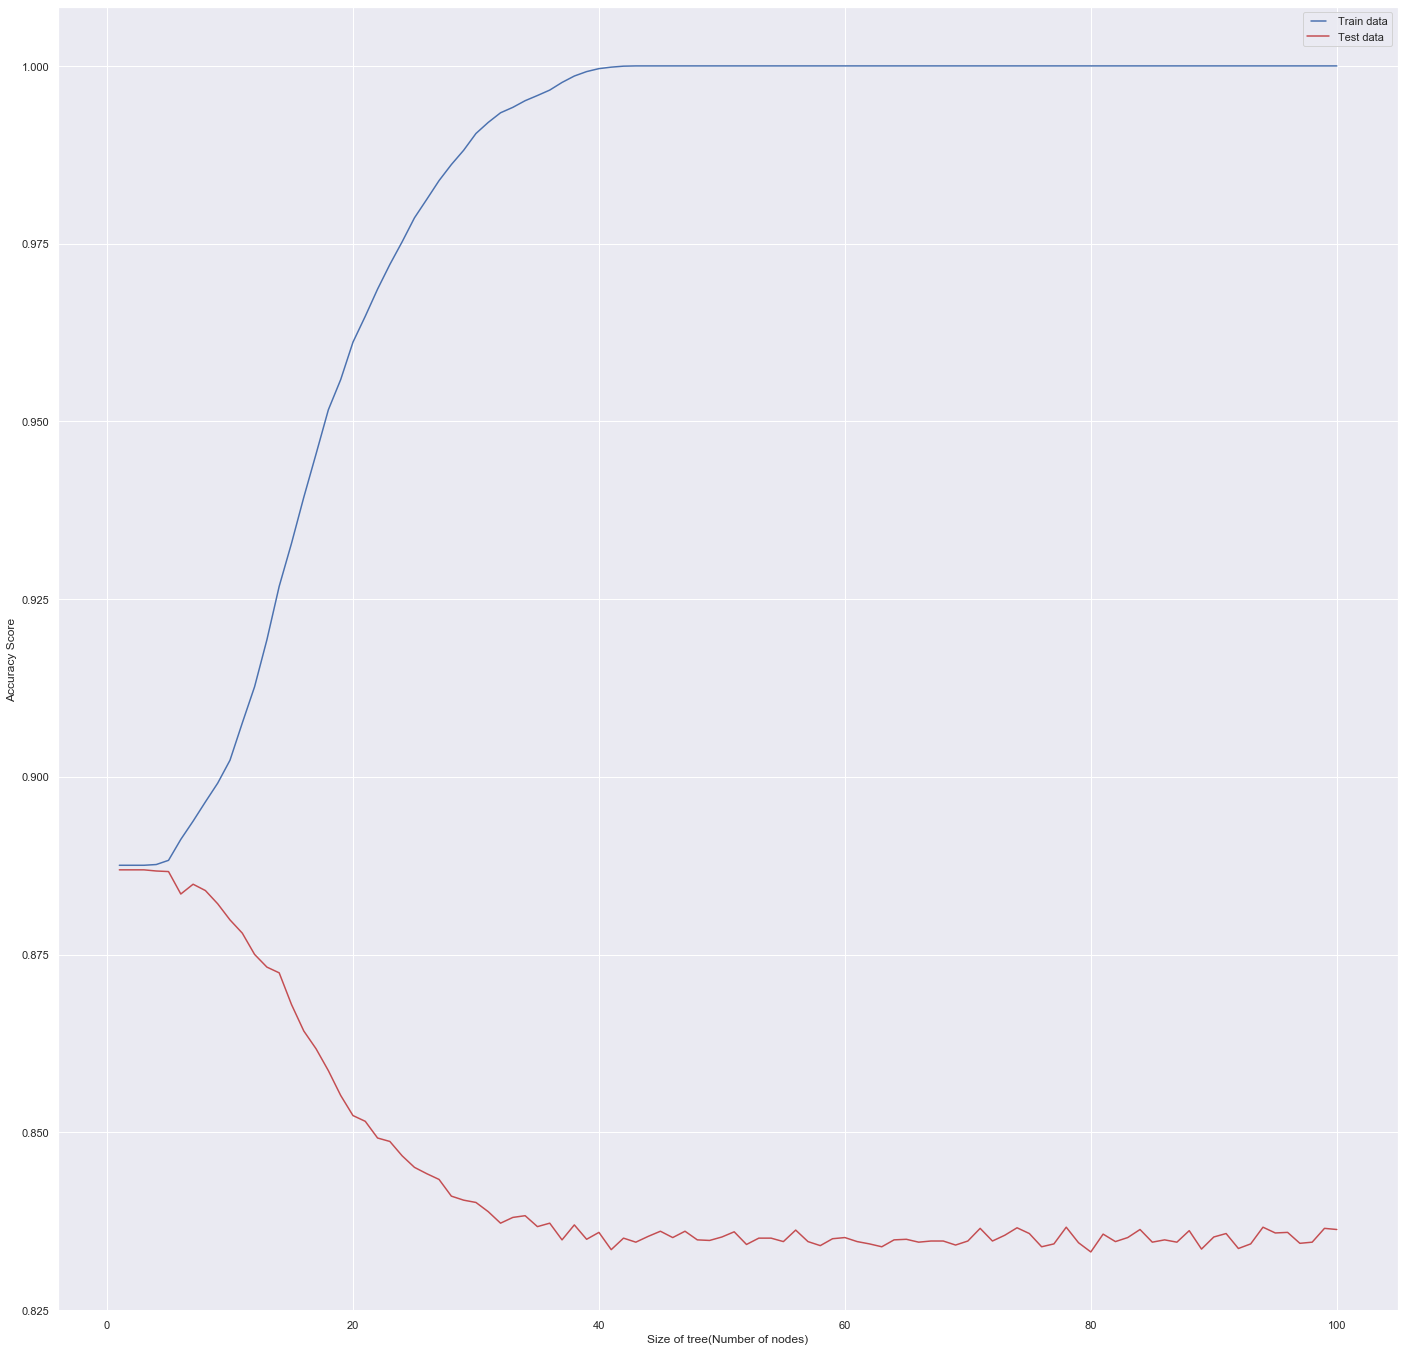

In [52]:
max_depths = np.linspace(1,100,100, endpoint=True)

train_results= []
test_results = []

for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)
    
    train_pred = dt.predict(X_train)
    
    acc_score_train = accuracy_score(y_train,train_pred)
    
    # Add accuracy score to train results
    train_results.append(acc_score_train)
    
    
    y_pred = dt.predict(X_test)
    
    acc_score_test = accuracy_score(y_test, y_pred)
    # Add accuracy score to test results
    test_results.append(acc_score_test)
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results, 'b', label='Train data')
line2, = plt.plot(max_depths, test_results, 'r', label='Test data')

plt.legend(handler_map = {line1 : HandlerLine2D(numpoints=2)})

plt.ylabel("Accuracy Score")
plt.xlabel("Size of tree(Number of nodes)")
plt.show()

##### Test accuracy is declining as the depth size is increasing. So, we can say they the model is overfitting as the depth of the tree increases.